#### 독립 동일 분포
- 확률변수가 서로 독립이라는 것은 확률변수가 다른 확률변수에 영향을 끼치지 않는다는 의미이다.
- 통계분석에서 취급하는 데이터 중 상당수가 독립이면서 다차원인 확률변수의 실현값으로 간주될 수 있다.
- 서로 독립이고 각각 동일한 확률분포를 따르는 다차원 확률변수를 독립동일분포라 한다.

#### 독립성
- 2개 이상의 확률변수가 서로 영향을 끼치지 않으며 관계가 없음을 나타내는 개념
- 2차원 확률변수 (X,Y)의 경우 다음과 같은 관계가 성립할 때 X,Y는 독립이라고 함 $f_{X,Y}(x,y) = f_X(x)f_Y(y)$
- 확률변수가 독립일 때 결합확률은 주변확률의 곱으로 작성할 수 있다.
- 일반화 : $f_{X_1,X_2,...,X_n}(x_1,x_2,...x_n) = f_{x_1}(x_1)f_{X_2}(x_2)...f_{X_n}(x_n)$

※ 함수 f가 이산형이면 확률함수, 연속형이면 밀도함수를 나타냄

#### 독립성과 무상관성
- 공분산이나 상관계수가 0일 때 무상관이라 하고 두 확률 변수 사이에는 상관성, 즉 선형관계가 없음을 나타냄
- 독립성도 무상관성도 두 확률변수가 서로 관계가 없다는 것을 나타내는 성질이다.
 - 무상관성보다 독립성이 더 강한 개념
 - 2개의 확률변수 X와 Y가 독립일 때 X와 Y는 무상관이 되지만 X와 Y가 무상관일 때 X와 Y가 반드시 독립인 것은 아님

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import stats
import scipy as sp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

linestyles = ['-','--',':','-.']
colors = ['red', 'blue', 'green','purple']

def f_X(x):
    return np.sum([f_XY(x,y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k,y) for x_k in x_set])

def E(XY,g):
    x_set,y_set, f_XY = XY
    return np.sum([g(x_i,y_j) * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

def V(XY,g):
    x_set,y_set, f_XY = XY
    mean = E(XY,g)
    return np.sum([(g(x_i,y_j)-mean)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set,y_set,f_XY = XY
    mean_X = E(XY,lambda x,y:x)
    mean_Y = E(XY,lambda x,y:y)
    return np.sum([(x_i-mean_X) * (y_j - mean_Y) *f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [32]:
# 2차원 확률변수 X와 Y는 독립
# 공분산이 0이므로 무상관인 것을 알 수 있음
x_set = np.arange(1,7)
y_set = np.arange(1,7)

def f_XY(x,y):
    if x in x_set and y in y_set:
        return x*y/441
    else:
        return 0
    
XY = [x_set,y_set,f_XY]
f_X(0) * f_Y(0) , f_XY(0,0)

(0, 0)

In [33]:
Cov(XY).round(4)

-0.0

In [34]:
# 무상관인 2개의 확률변수
x_set = np.array([0,1])
y_set = np.array([-1,0,1])

def f_XY(x,y):
    if (x,y) in [(0,0),(1,1),(1,-1)]:
        return 1/3
    else:
        return 0
    
XY =[x_set,y_set,f_XY]
# 공분산은 0이므로 확률변수 X,Y는 무상관
print(Cov(XY).round(4))

#독립성의 정의가 성립하는지 확인
f_X(0) * f_Y(0) , f_XY(0,0)

# 무상관이어도 독립성이 성립되지 않을 수 있음

0.0


(0.1111111111111111, 0.3333333333333333)

#### 합의 분포
- 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1,X_2,...,X_n의 합 \sum_{i=1}^n X_i = X_1 + X_2 + ... + X_n$이 따르는 확률 분포를 의미
- 합의 분포를 이해하면 확률변수의 합을 나눈 표본평균의 분포도 쉽게 이해할 수 있음

In [35]:
# 정규분포의 합의 분포
# 서로 독립인 X ~ N(1,2) , Y ~ N(2,3)이 있을 때 X+Y의 분포는 N(3,5)를 따름

rv1 = stats.norm(1,np.sqrt(2))
rv2 = stats.norm(2,np.sqrt(3))

sample_size = int(1e6)

X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)

sum_sample = X_sample + Y_sample

np.mean(sum_sample),np.var(sum_sample)

(2.996865004674861, 5.008631313682652)

- 재생성 : 동일한 분포를 따르는 2개의 독립인 확률변수에 대해서 그 합도 동일한 확률분포가 되는 성질

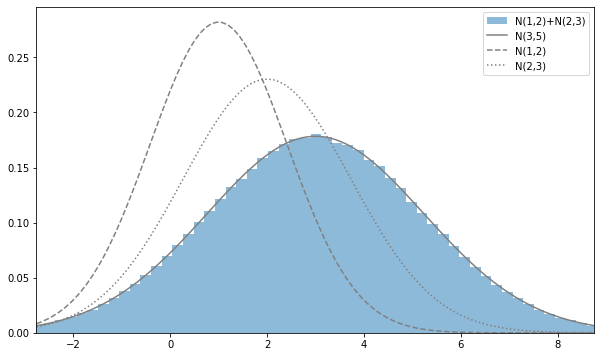

In [36]:
plt.figure(figsize = (10,6))

rv = stats.norm(3,np.sqrt(5))
xs = np.linspace(rv.isf(0.995),rv.isf(0.005), 100)

plt.hist(sum_sample, bins = 100,density = True, alpha = 0.5, label = 'N(1,2)+N(2,3)')
plt.plot(xs,rv.pdf(xs),label='N(3,5)',color = 'gray')
plt.plot(xs,rv1.pdf(xs),label='N(1,2)',ls = '--',color = 'gray')
plt.plot(xs,rv2.pdf(xs),label='N(2,3)',ls = ':',color = 'gray')

plt.legend()
plt.xlim(rv.isf(0.995),rv.isf(0.005))
plt.show()

#### 포아송 분포의 합의 분포
- 서로 독립인 X ~ Poi(3)과 Y ~ Poi(4)가 있을 때 확률 변수 X + Y도 포아송 분포를 따르고 X + Y ~ Poi(7)이 된다.
- n개의 포아송 분포의 합이 되더라도 재생성에 의하여 포아송 분포를 따른다.

In [37]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)


X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)

sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(6.996646, 6.983620750684003)

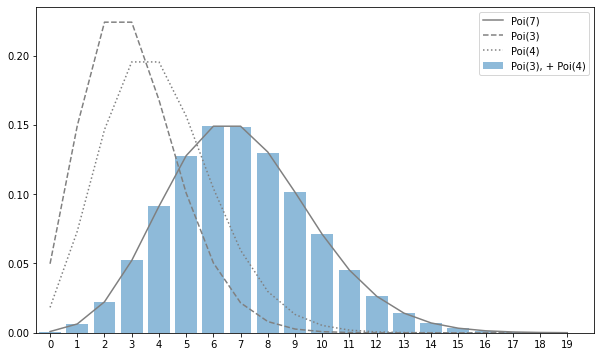

In [38]:
plt.figure(figsize = (10,6))

rv = stats.poisson(7)
xs = np.arange(20)

#hist, _ = np.histogram(sum_sample,bins = 20 ,range=(0,20),normed = True)
hist , _ =  np.histogram(sum_sample,bins = 20,range = (0,20),density = True)


plt.bar(xs,hist,alpha = 0.5,label = 'Poi(3), + Poi(4)')
plt.plot(xs,rv.pmf(xs),label='Poi(7)',color = 'gray')
plt.plot(xs,rv1.pmf(xs),label='Poi(3)',ls = '--',color = 'gray')
plt.plot(xs,rv2.pmf(xs),label='Poi(4)',ls = ':',color = 'gray')

plt.legend()
plt.xlim(-0.5,20)
plt.xticks(np.arange(20))
plt.show()

베르누이 분포의 합의 분포
- 베르누이 분포에는 재생성이 없다.
- 베르누이 분포의 합은 이항분포가 되는 성질이 있다

In [39]:
# 성공 확률이 0.3인 베르누이 분포를 따르는 확률 변수 10개에 대하여 백만번 표본을 추출하여 표본평균과 표본 분산을 산출
# 표본 데이터가 하나면 베르누이 분포가 되고 표본 데이터가 여럿이면 이항분포가 된다.
p = 0.3
rv = stats.bernoulli(p)
sample_size = int(1e6)
Xs_sample = rv.rvs((10,sample_size))
print('표본추출: ', Xs_sample.shape, '첫번째 열 :', Xs_sample[:,0],'\n')
sum_sample = np.sum(Xs_sample,axis = 0)
np.mean(sum_sample), np.var(sum_sample,ddof = 1)

표본추출:  (10, 1000000) 첫번째 열 : [0 0 0 0 0 1 1 0 0 1] 



(3.000974, 2.0991151504391516)

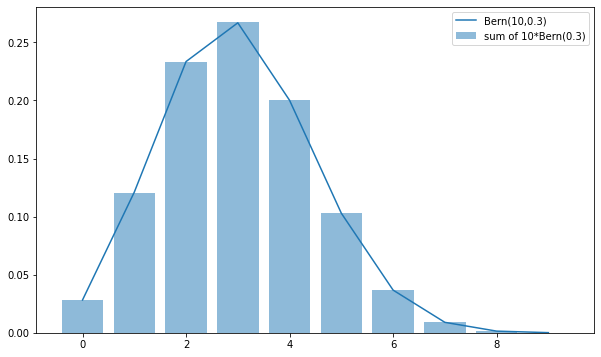

In [41]:
plt.figure(figsize = (10,6))

rv  = stats.binom(10,p)
xs = np.arange(10)
hist , _ = np.histogram(sum_sample,bins = 10, range = (0,10), normed = True)

plt.bar(xs, hist,alpha = 0.5, label = 'sum of 10*Bern(0.3)')
plt.plot(xs,rv.pmf(xs),label = 'Bern(10,0.3)')
plt.legend()


표본평균의 분포
- 표본평균의 분포란 서로 독립이고 동일한 확률분포를 따르는 확률 변수 $X_1,X_2,...,X_n$의 표본평균이 따르는 분포
- 이 분포는 중심극한정리나 대수의 법칙 등 추측통계에서 중요한 성질을 담고 있기 때문에 유의해야 함

  $E(X) = \mu$
  
  $V(X) = \sigma^2/n$

In [42]:
# 정규분포의 표본평균 분포
mean = 1
var = 2
rv = stats.norm(mean,np.sqrt(var))

n = 10
sample_size = int(1e6)

X_sample = rv.rvs((n,sample_size))
print('표본 사이즈 10, 표본 개수 1000000: ',X_sample.shape, '\n')

sample_mean = np.mean(X_sample,axis = 0)
print('표본평균 백만개: ',sample_mean, len(sample_mean), '\n' )
print('표본평균 백만개의 평균: ', np.mean(sample_mean))
print('표본평균 백만개의 분산: ', np.var(sample_mean))

표본 사이즈 10, 표본 개수 1000000:  (10, 1000000) 

표본평균 백만개:  [1.64659787 0.91444753 0.60338965 ... 0.93488188 0.5943205  1.5465274 ] 1000000 

표본평균 백만개의 평균:  1.000521748861863
표본평균 백만개의 분산:  0.19967335453014884


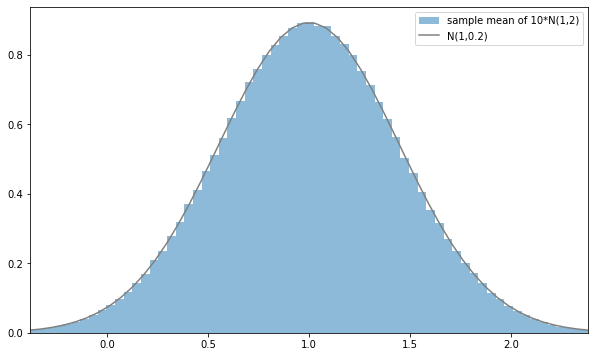

In [43]:
plt.figure(figsize = (10,6))

rv_true = stats.norm(mean,np.sqrt(var/n))

xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001))
plt.hist(sample_mean,bins=100,density=True,alpha = 0.5, label = 'sample mean of 10*N(1,2)')
plt.plot(xs,rv_true.pdf(xs), label = 'N(1,0.2)',color = 'gray')
plt.legend()
plt.xlim(rv_true.isf(0.999),rv_true.isf(0.001))
plt.show()

4.9998715 0.4997352734877502


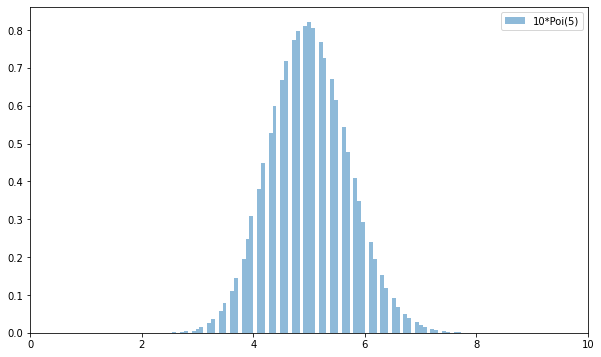

In [53]:
# 포아송 분포의 표본평균 분포는 정규분포에 근사한 형태를 따름

lam = 5
rv = stats.poisson(lam)

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n,sample_size))
sample_mean = np.mean(Xs_sample, axis = 0)
print( np.mean(sample_mean), np.var(sample_mean))

plt.figure(figsize = (10,6))
plt.hist(sample_mean, bins = 100, density = True, alpha = 0.5, label = f'10*Poi({lam})')

plt.legend()
plt.xlim(lam-lam,lam+lam)
plt.show()

#### 합의 분포와 표본평균의 분포
- 포아송 분포나 정규분포 같은 재생성이 있는 일부 확률분포를 제외하면 합의 분포가 어떤 형태를 보이는지 일반적으로 알 수 없다.
- 표본평균의 분포가 되면 재생성을 지닌 포아송 분포조차도 그 형태를 유지할 수 없다.
- 원래 분포가 무엇이든지 간에 표본평균의 분포는 정규분포에 근사한다.

#### 중심극한정리
- 확률변수 $X_1, X_2,...,X_n$이 서로 독립이고 기댓값이 $\mu, 분산이 {\sigma}^2$인 확률분포를 따를 때 n이 커짐에 따라 표본평균 $\bar{X}의 분포는 정규분포 N(\mu,{sigma}^2/n)$에 가까워진다

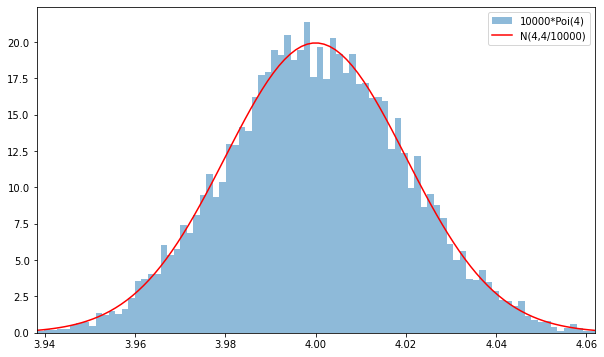

In [56]:
# 중심극한정리를 입증하세요.
lam = 4
rv = stats.poisson(lam)

n = 10000
sample_size = int(1e4)
Xs_sample = rv.rvs((n,sample_size))
sample_mean = np.mean(Xs_sample, axis = 0)
rv_true = stats.norm(lam,np.sqrt(lam/n))
xs = np.linspace(rv_true.isf(0.999),rv_true.isf(0.001),100)


plt.figure(figsize = (10,6))
plt.hist(sample_mean, bins = 100, density = True, alpha = 0.5, label = f'{n}*Poi({lam})')
plt.plot(xs,rv_true.pdf(xs),label = (f'N({lam},{lam}/{n})'),color = 'red')

plt.legend()
plt.xlim(rv_true.isf(0.999),rv_true.isf(0.001))
plt.show()

#### 대수의 법칙
- 확률변수 $X_1,X_2,...,X_n$이 서로 독립이고 평균이 $\mu, 분산이 \sigma^2$일 것 같은 확률분포를 따를 때 n이 커짐에 따라 표본평균은 $\mu$에 수렴한다.

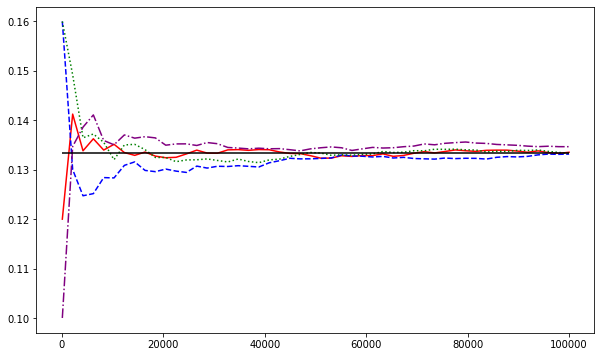

In [62]:
# sample_size의 변화에 따라 표본평균이 모평균에 수렴함을 입증하세요.

p = 6/45

rv = stats.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n,5))
space = np.linspace(100,n,50).astype(int)
plot_list = np.array([np.mean(sample[:sp],axis=0) for sp in space]).T

plt.figure(figsize = (10,6))
for pl, ls, color in zip(plot_list, linestyles,colors):
    plt.plot(space,pl,ls = ls, color =color)
    
plt.hlines(p,-1,n,'k')
plt.show()
